In [8]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = df.drop(['target'], axis=1).values # 독립변인들의 value값만 추출
y = df['target'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(x, columns=features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [136]:
from sklearn.decomposition import PCA
n_components = 4
comp_name_list = []
for idx in range(n_components):
    comp_name_list.append("PC{}".format(idx+1))
pca = PCA(n_components=n_components) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = comp_name_list)
principalDf["target"] = df["target"]
# 주성분으로 이루어진 데이터 프레임 구성
principalDf.head()

,PC1,PC2,PC3,PC4,target
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


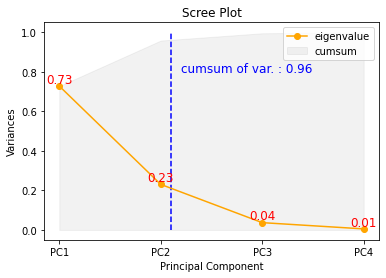

In [138]:
import matplotlib.pyplot as plt
eigenvalue_list = pca.explained_variance_ratio_
eigenvalue_dic = []
for idx, eigenvalue in enumerate(eigenvalue_list):
    eigenvalue_dic.append({"comp" : "PC{}".format(idx+1), "eigenvalue" : eigenvalue})
eigenvalue_df = pd.DataFrame(eigenvalue_dic)
#누적합 계산하여 PC들의 분산합이 얼마나 되는지도 보여줄 것
eigenvalue_df["cumsum"] = eigenvalue_df["eigenvalue"].cumsum()
plt.plot(eigenvalue_df["comp"], eigenvalue_df["eigenvalue"], label="eigenvalue", 
         color="orange", marker="o")
for item in eigenvalue_df["eigenvalue"].items():
    plt.text(item[0], item[1], "{:4.2f}".format(item[1]),
             fontsize = 12, color="red", horizontalalignment="center", verticalalignment="bottom") 
plt.fill_between(eigenvalue_df["comp"], [0 for x in range(n_components)], eigenvalue_df["cumsum"],
                 color="k", alpha=0.05, label="cumsum")
plt.vlines(1.1, 0, 1, color="blue", linestyles="dashed")
plt.text(1.2, 0.8, "cumsum of var. : 0.96", fontsize = 12, color="blue")
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variances")
plt.legend()
plt.show()

elbow point를 고려해 보면 2개나 3개가 적당해 보인다.

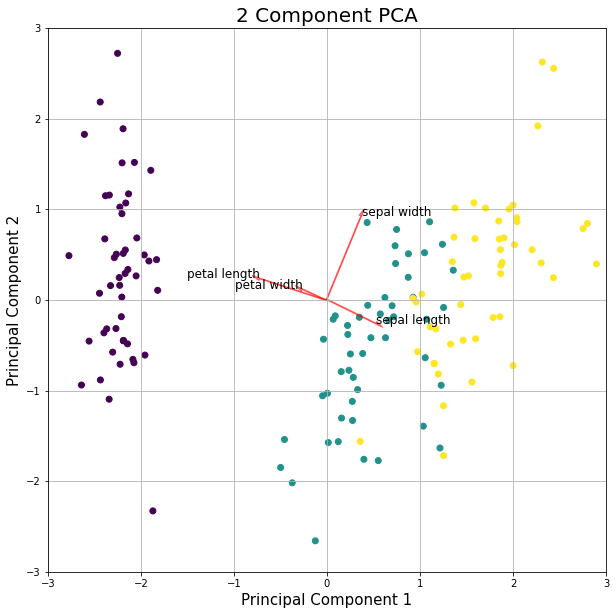

In [163]:
principalDf["target_num"] = 0
for idx, target in enumerate(principalDf["target"].unique()):
    principalDf.loc[(principalDf.target == target), "target_num"] = idx+1
plt.figure(figsize=(10,10))
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 Component PCA', fontsize = 20)
plt.scatter(principalDf["PC1"], principalDf["PC2"], c=principalDf["target_num"])
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid(b=True)

#biplot도 그려준다. 원천 변수들이 PC1과 2에 얼마나 기여했는지를 나타낸다.
coeff = pca.components_
for i, c in enumerate(coeff):
    plt.arrow(0, 0, c[0], c[1], color = "r",alpha = 0.5
             , width=0.02, shape="right") #c[0]은 PC1에 대한 기여도, c[1]은 PC2에 대한 기여도
    if c[0] < 0:
        ha = "right"
    else:
        ha = "left"
    plt.text(c[0], c[1], df.columns[i], fontsize = 12, horizontalalignment=ha)

plt.show()

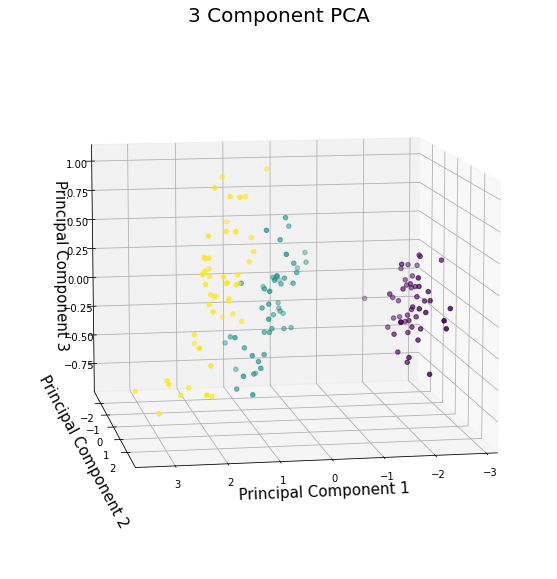

In [174]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)
ax.view_init(10, 80)
ax.scatter(principalDf["PC1"], principalDf["PC2"], principalDf["PC3"], c=principalDf["target_num"])
plt.show()